In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as opt
import time

In [81]:
print(torch.cuda.is_available())
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device ='cpu'

True


In [82]:
data = pd.read_csv('cancer.csv')
data.head()

,5,1,1.1,1.2,2,1.3,3,1.4,1.5,0
0,5,4,4,5,7,10,3,2,1,0
1,3,1,1,1,2,2,3,1,1,0
2,6,8,8,1,3,4,3,7,1,0
3,4,1,1,3,2,1,3,1,1,0
4,8,10,10,8,7,10,9,7,1,1


In [83]:
x=torch.tensor(data.iloc[:500,:9].values, dtype=torch.float32)
t=torch.tensor(data.iloc[:500,9:].values, dtype=torch.float32)
x_test=torch.tensor(data.iloc[500:,:9].values, dtype=torch.float32)
t_test=torch.tensor(data.iloc[500:,9:].values, dtype=torch.float32)

In [84]:
input_units=9
hidden_units=500
output_units=1
epochs = 10000

In [85]:
model = nn.Sequential(nn.Linear(input_units, hidden_units), \
                      nn.Sigmoid(), \
                      nn.Linear(hidden_units, output_units),\
                      nn.Sigmoid(),\
                      )
model

Sequential(
  (0): Linear(in_features=9, out_features=500, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=500, out_features=1, bias=True)
  (3): Sigmoid()
)

In [86]:
loss_funct=nn.MSELoss()
optimizer= opt.Adam(model.parameters(), lr=0.01)

In [87]:
model = model.to(device)
x = x.to(device)
t = t.to(device)
x_test = x_test.to(device)
t_test = t_test.to(device)

In [88]:
start_time = time.time()
losses=[]
for i in range (epochs):
  y_pred=model(x)
  loss = loss_funct(y_pred,t)
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()

  optimizer.step()
  if i%10 ==0:
    print(i,loss.item())


0 0.25780728459358215
10 0.056896790862083435
20 0.030245667323470116
30 0.027853230014443398
40 0.026440724730491638
50 0.02503354661166668
60 0.024148933589458466
70 0.023603100329637527
80 0.023088369518518448
90 0.022639865055680275
100 0.02223491109907627
110 0.021857138723134995
120 0.02150089293718338
130 0.021158263087272644
140 0.02082228846848011
150 0.020486515015363693
160 0.020145971328020096
170 0.01979653351008892
180 0.019432904198765755
190 0.01905011013150215
200 0.018644079566001892
210 0.01821122318506241
220 0.0177473071962595
230 0.017250027507543564
240 0.016724402084946632
250 0.016176525503396988
260 0.01561239268630743
270 0.015031336806714535
280 0.014430148527026176
290 0.013802907429635525
300 0.013140863738954067
310 0.012470481917262077
320 0.011822344735264778
330 0.011212131008505821
340 0.010645542293787003
350 0.01012381911277771
360 0.009648354724049568
370 0.009219760075211525
380 0.008835168555378914
390 0.008488171733915806
400 0.00817055068910122

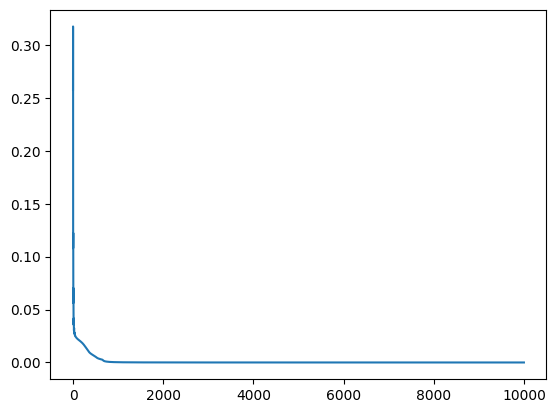

In [89]:
plt.plot(range(0,epochs),losses)


In [90]:
execution_time = (time.time() - start_time)
print('Execution time in seconds: ' + str(execution_time))

Execution time in seconds: 20.808741807937622


In [91]:
t_pred = model(x_test)

t_pred[t_pred>=0.5]=1
t_pred[t_pred<0.5]=0

evalu=torch.eq(t_test,t_pred)
positive = torch.count_nonzero(evalu == True)
negative = torch.count_nonzero(evalu == False)
#print(positive,'\n')
print("Accuracy : ", 100*positive/(positive+negative))

Accuracy :  tensor(97.8022)
